<a href="https://www.kaggle.com/code/victorluizroman/titanic-machine-learning-from-disaster?scriptVersionId=245307060" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Titanic Survival Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="dark")
sns.set_palette("pastel")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


Data Dictionary:
Variable   Definition	                                Key

survival   Survival	                                    0 = No, 1 = Yes
pclass	   Ticket class	                                1 = 1st, 2 = 2nd, 3 = 3rd
sex	       Sex	                                        
Age	       Age in years	                                 
sibsp	   # of siblings / spouses aboard the Titanic   
parch	   # of parents / children aboard the Titanic	
ticket	   Ticket number	                             
fare	   Passenger fare	                             
cabin	   Cabin number	                                 
embarked   Port of Embarkation	                        C = Cherbourg, Q = Queenstown, S = Southampton



Variable Notes:
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

train['Name'] = train['Name'].str.replace(' ([A-Za-z]+)\.', '', regex=True)
test['Name'] = test['Name'].str.replace(' ([A-Za-z]+)\.', '', regex=True)

In [12]:
def impute_by_distribution(row):
    if pd.isnull(row['Age']):
        ages = train[train['Title'] == row['Title']]['Age']
        prob_dist = ages.value_counts(normalize=True)
        return np.random.choice(prob_dist.index, p=prob_dist.values)
    else:
        return row['Age']

train['Age'] = train.apply(impute_by_distribution, axis=1)
test['Age'] = test.apply(impute_by_distribution, axis=1)

In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [14]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,"Icard, Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,1,"Stone, George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


In [15]:
most_frequent_embarked_pclass1 = train[(train['Pclass'] == 1) & (train['Embarked'].notnull())]['Embarked'].mode()[0]
train['Embarked'] = train['Embarked'].fillna(most_frequent_embarked_pclass1)

In [16]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [17]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [18]:
train.drop(columns=['Cabin'], inplace=True)  
test.drop(columns=['Cabin'], inplace=True)  

In [19]:
test[test['Fare'].isnull()]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
152,1044,3,"Storey, Thomas",male,60.5,0,0,3701,NaN,S,Mr


In [20]:
test[
(test['Pclass'] == 3) & 
(test['Sex'] == 'male') & 
(test['Age'] > 60) & 
(test['SibSp'] == 0) & 
(test['Parch'] == 0) & 
(test['Embarked'] == 'S') &
(test['Title'] == 'Mr') 
]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
152,1044,3,"Storey, Thomas",male,60.5,0,0,3701,NaN,S,Mr
219,1111,3,"Thomson, Alexander Morrison",male,62.0,0,0,32302,8.05,S,Mr


In [21]:
test.loc[test['PassengerId'] == 1044, 'Fare'] = 7.55

In [22]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

In [23]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

In [24]:
bins = [0, 12, 18, 60, 100]  
labels = ['Child (0-12)', 'Teenager (13-17)', 'Adult (18-59)', 'Senior (60+)']  
train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels)  

In [25]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [26]:
train['IsAlone'] = (train['FamilySize']==1).astype(int)
test['IsAlone'] = (test['FamilySize']==1).astype(int)

In [27]:
train['HasChildren'] = ((train['Age'] >= 18) & (train['Parch'] > 0)).astype(int)  
test['HasChildren'] = ((test['Age'] >= 18) & (test['Parch'] > 0)).astype(int)  

In [28]:
train['ImmediateFamily'] = ((train['SibSp'] > 0) | (train['Parch'] > 0)).astype(int)  
test['ImmediateFamily'] = ((test['SibSp'] > 0) | (test['Parch'] > 0)).astype(int)  

In [29]:
train['ChildWithNanny'] = ((train['Age'] < 18) & (train['Parch'] == 0)).astype(int)  
test['ChildWithNanny'] = ((test['Age'] < 18) & (test['Parch'] == 0)).astype(int)  

In [30]:
train['FarePerPerson'] = train['Fare'] / train['FamilySize']
test['FarePerPerson'] = test['Fare'] / test['FamilySize']

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,AgeGroup,FamilySize,IsAlone,HasChildren,ImmediateFamily,ChildWithNanny,FarePerPerson
0,1,0,3,"Braund, Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,Adult (18-59),2,0,0,1,0,3.62500
1,2,1,1,"Cumings, John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C,Mrs,Adult (18-59),2,0,0,1,0,35.64165
2,3,1,3,"Heikkinen, Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,Adult (18-59),1,1,0,0,0,7.92500
3,4,1,1,"Futrelle, Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,Adult (18-59),2,0,0,1,0,26.55000
4,5,0,3,"Allen, William Henry",male,35.0,0,0,373450,8.0500,S,Mr,Adult (18-59),1,1,0,0,0,8.05000


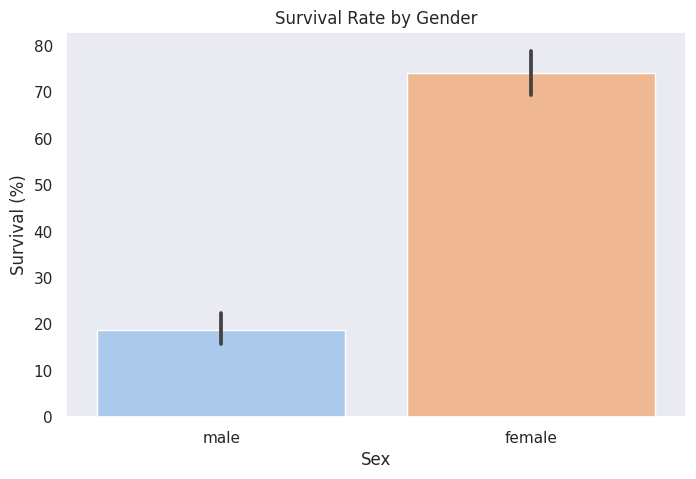

In [32]:
plt.figure(figsize=(8,5))
sns.barplot(x='Sex', y='Survived', data=train,
            estimator=lambda x: sum(x)*100/len(x))
plt.title('Survival Rate by Gender')
plt.ylabel('Survival (%)')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


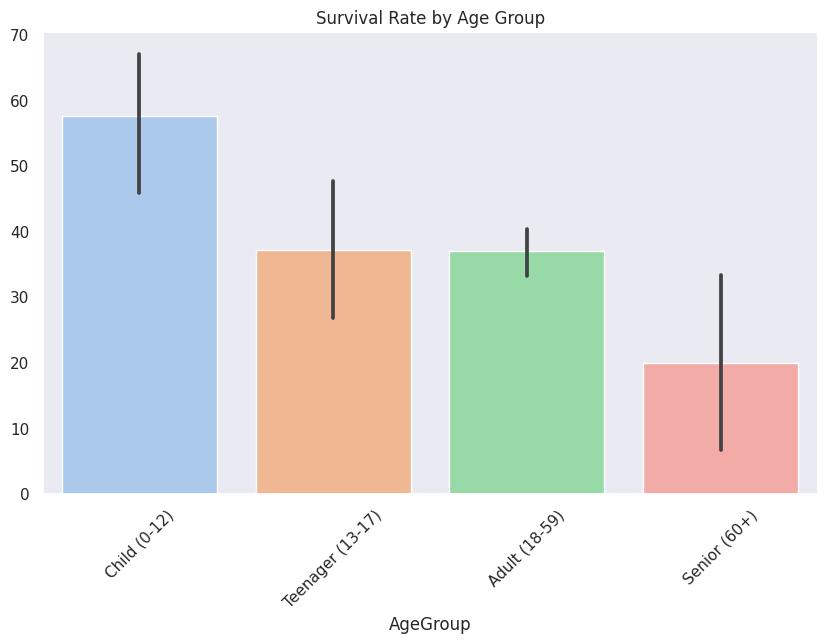

In [33]:
plt.figure(figsize=(10,6))
age_order = ['Child (0-12)', 'Teenager (13-17)', 'Adult (18-59)', 'Senior (60+)']
ax = sns.barplot(x='AgeGroup', y='Survived', data=train, order=age_order,
                estimator=lambda x: sum(x)*100/len(x))
plt.title('Survival Rate by Age Group')
plt.xticks(rotation=45)
plt.ylabel('')
plt.show()

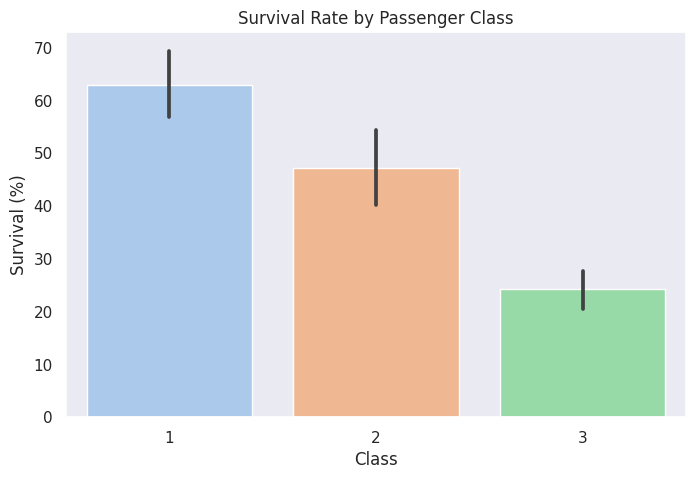

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(x='Pclass', y='Survived', data=train,
            estimator=lambda x: sum(x)*100/len(x))
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival (%)')
plt.xlabel('Class')
plt.show()

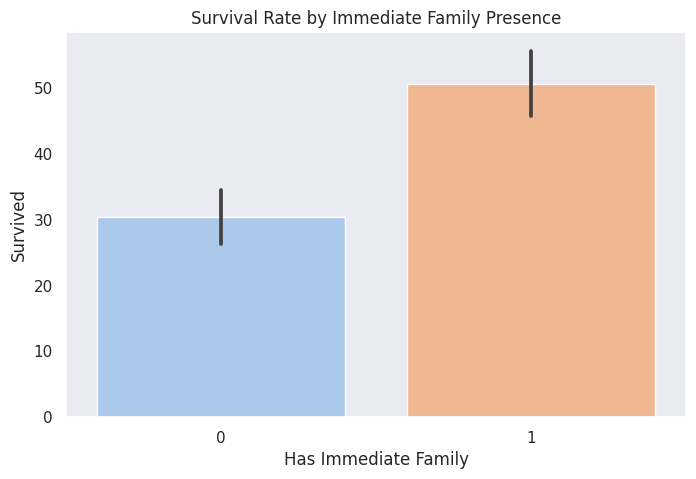

In [35]:
plt.figure(figsize=(8,5))
sns.barplot(x='ImmediateFamily', y='Survived', data=train,
            estimator=lambda x: sum(x)*100/len(x))
plt.title('Survival Rate by Immediate Family Presence')
plt.xlabel('Has Immediate Family')
plt.show()

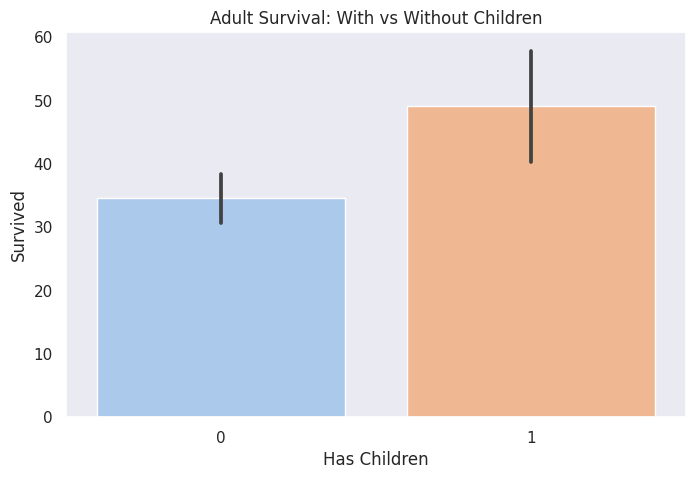

In [36]:
plt.figure(figsize=(8,5))
sns.barplot(x='HasChildren', y='Survived', 
            data=train[train['AgeGroup'] == 'Adult (18-59)'],
            estimator=lambda x: sum(x)*100/len(x))
plt.title('Adult Survival: With vs Without Children')
plt.xlabel('Has Children')
plt.show()

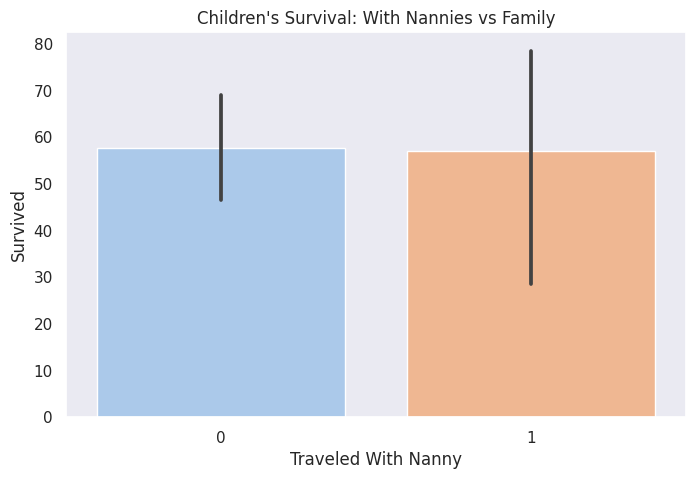

In [37]:
if 'ChildWithNanny' in train.columns:
    plt.figure(figsize=(8,5))
    sns.barplot(x='ChildWithNanny', y='Survived', 
                data=train[train['AgeGroup'] == 'Child (0-12)'],
                estimator=lambda x: sum(x)*100/len(x))
    plt.title('Children\'s Survival: With Nannies vs Family')
    plt.xlabel('Traveled With Nanny')
    plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


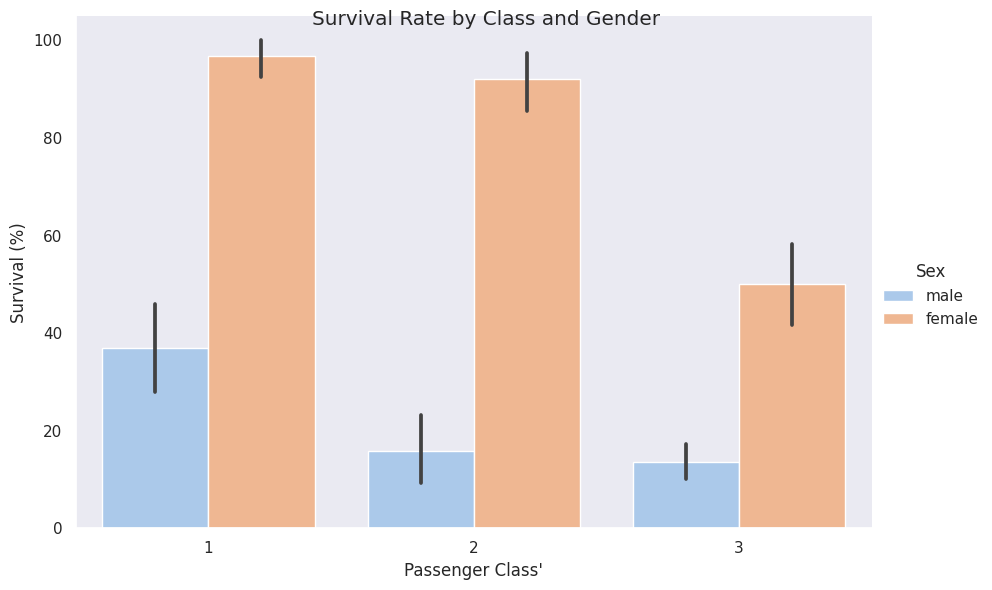

In [38]:
g = sns.catplot(
    x='Pclass',
    y='Survived',
    hue='Sex',
    data=train,
    kind='bar',
    height=6,
    aspect=1.5,
    estimator=lambda x: sum(x)*100/len(x)
)
g.set_axis_labels("Passenger Class'", "Survival (%)")
g.fig.suptitle('Survival Rate by Class and Gender')
plt.show()

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      891 non-null    int64   
 1   Survived         891 non-null    int64   
 2   Pclass           891 non-null    int64   
 3   Name             891 non-null    object  
 4   Sex              891 non-null    object  
 5   Age              891 non-null    float64 
 6   SibSp            891 non-null    int64   
 7   Parch            891 non-null    int64   
 8   Ticket           891 non-null    object  
 9   Fare             891 non-null    float64 
 10  Embarked         891 non-null    object  
 11  Title            891 non-null    object  
 12  AgeGroup         891 non-null    category
 13  FamilySize       891 non-null    int64   
 14  IsAlone          891 non-null    int64   
 15  HasChildren      891 non-null    int64   
 16  ImmediateFamily  891 non-null    int64   
 1

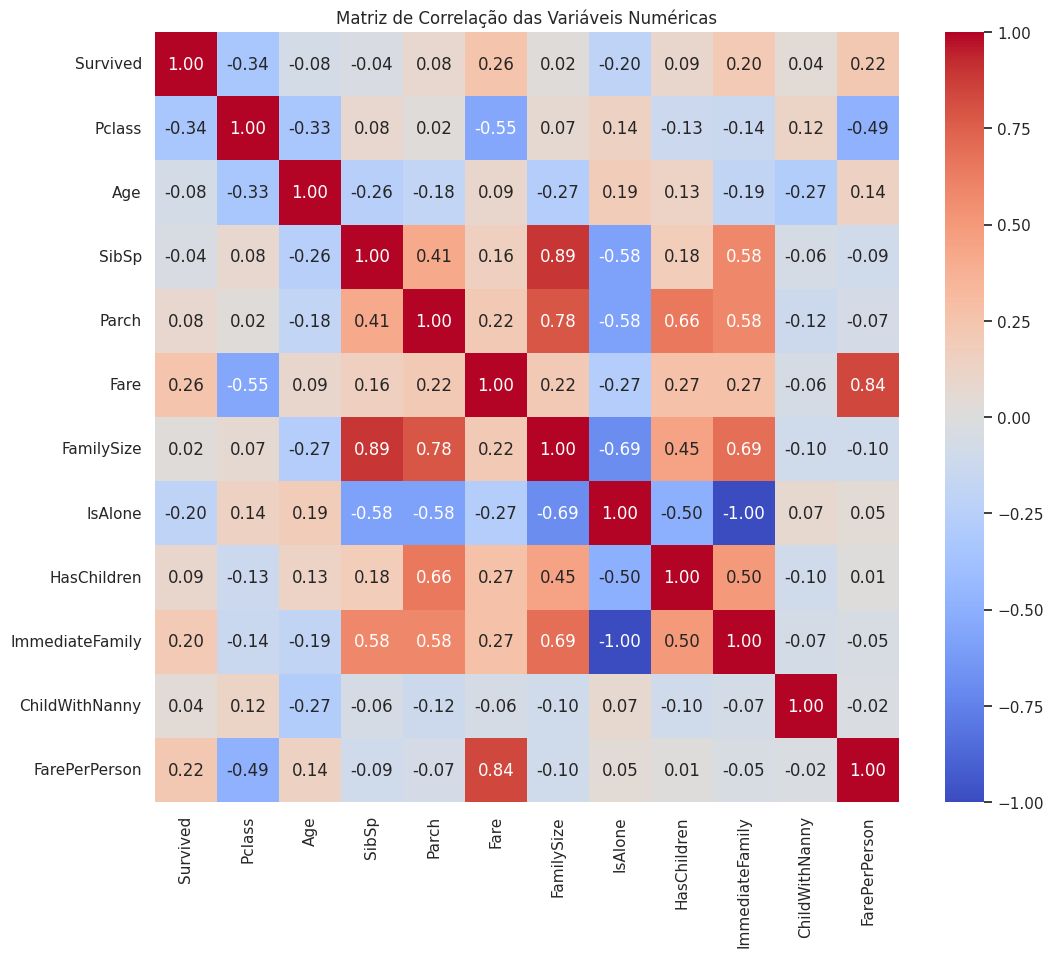

In [40]:
numerical_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
                  'FamilySize', 'IsAlone', 'HasChildren', 'ImmediateFamily',
                  'ChildWithNanny', 'FarePerPerson']

correlation_matrix = train[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


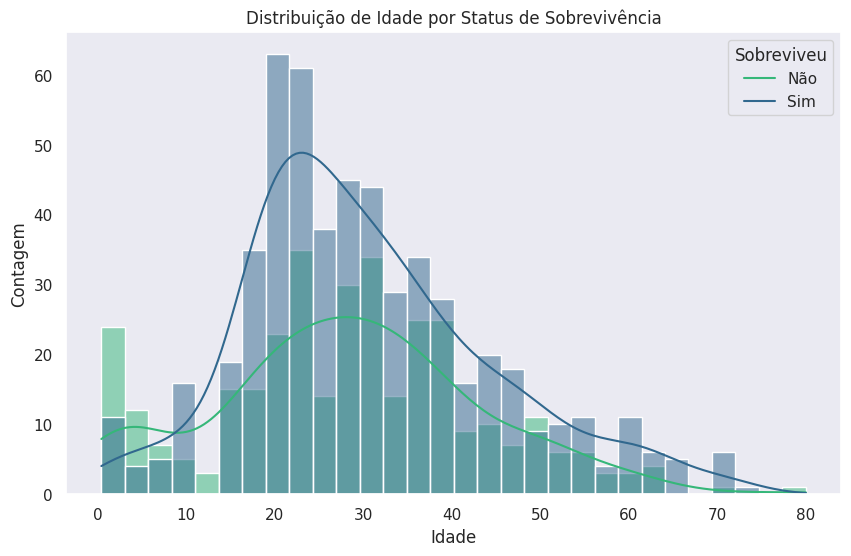

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='Age', hue='Survived', kde=True, palette='viridis', bins=30)
plt.title('Distribuição de Idade por Status de Sobrevivência')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


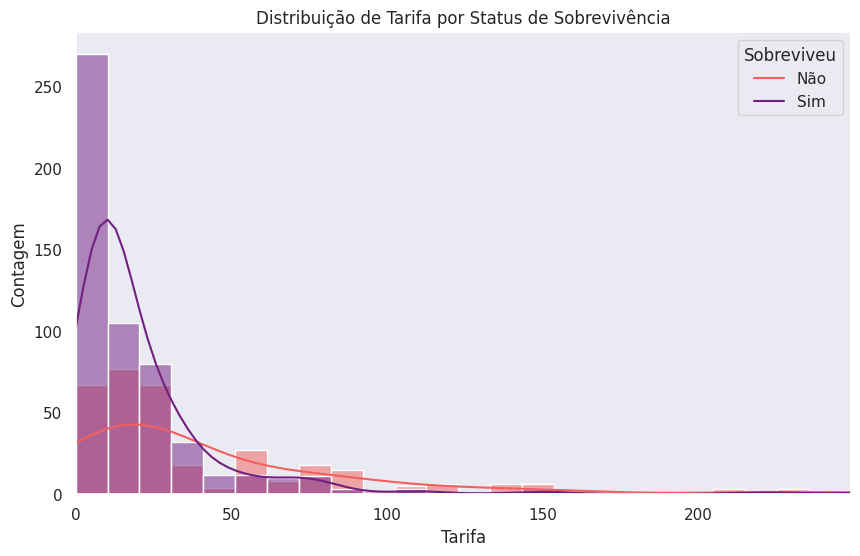

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='Fare', hue='Survived', kde=True, palette='magma', bins=50)
plt.title('Distribuição de Tarifa por Status de Sobrevivência')
plt.xlabel('Tarifa')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.xlim(0, train['Fare'].quantile(0.99))
plt.show()

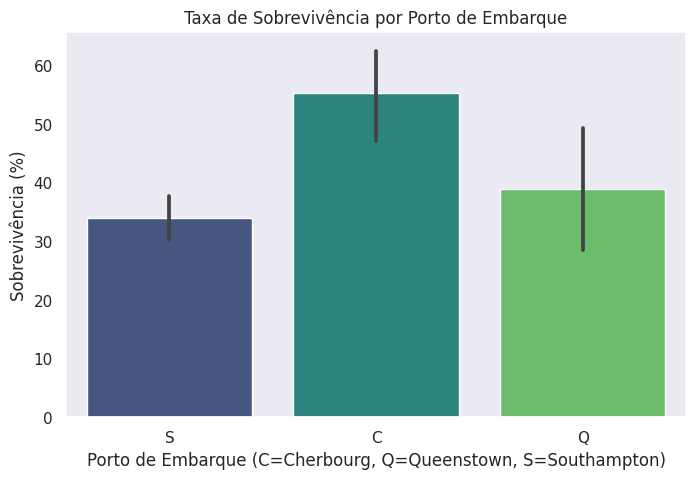

In [43]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Embarked', y='Survived', data=train,
            estimator=lambda x: sum(x) * 100 / len(x), palette='viridis')
plt.title('Taxa de Sobrevivência por Porto de Embarque')
plt.xlabel('Porto de Embarque (C=Cherbourg, Q=Queenstown, S=Southampton)')
plt.ylabel('Sobrevivência (%)')
plt.show()

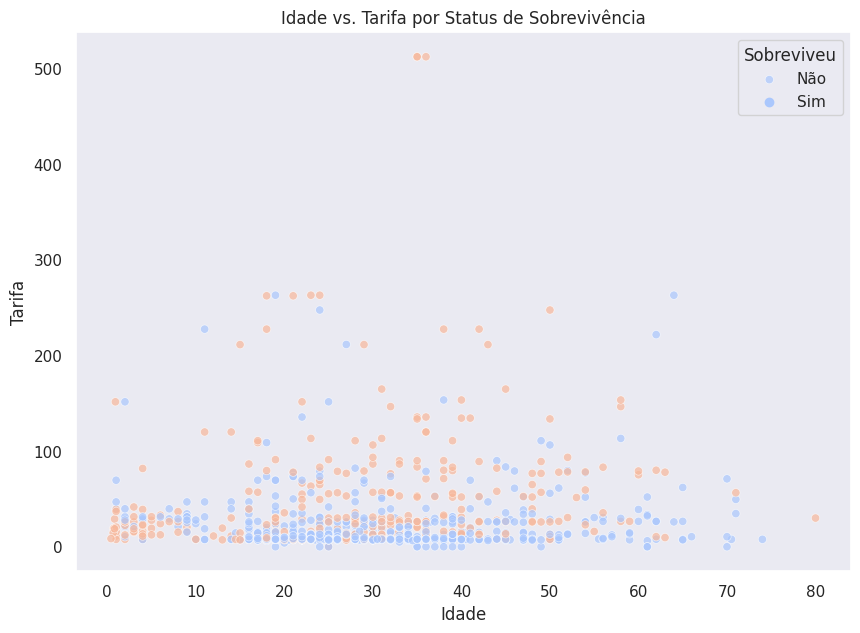

In [44]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=train, x='Age', y='Fare', hue='Survived', palette='coolwarm', alpha=0.7)
plt.title('Idade vs. Tarifa por Status de Sobrevivência')
plt.xlabel('Idade')
plt.ylabel('Tarifa')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()

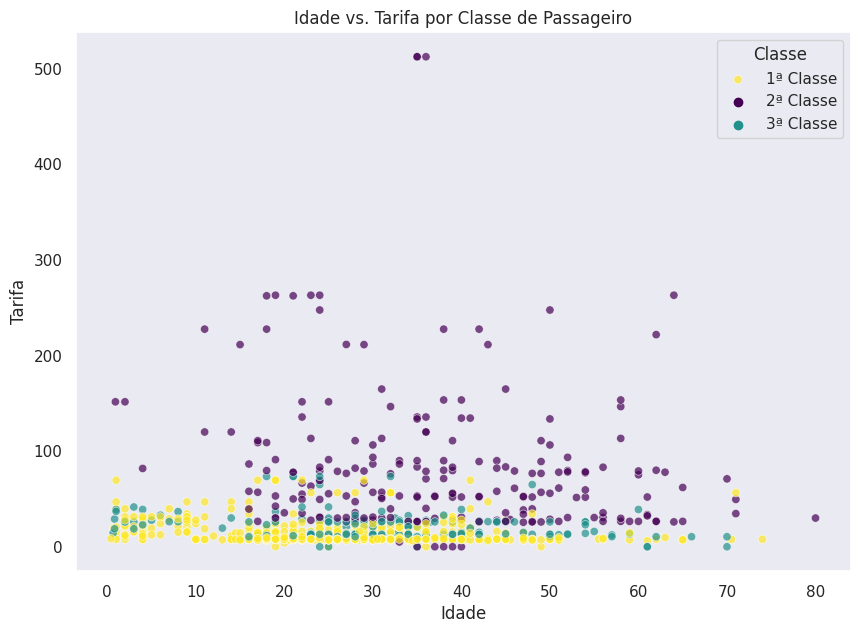

In [45]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=train, x='Age', y='Fare', hue='Pclass', palette='viridis', alpha=0.7)
plt.title('Idade vs. Tarifa por Classe de Passageiro')
plt.xlabel('Idade')
plt.ylabel('Tarifa')
plt.legend(title='Classe', labels=['1ª Classe', '2ª Classe', '3ª Classe'])
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


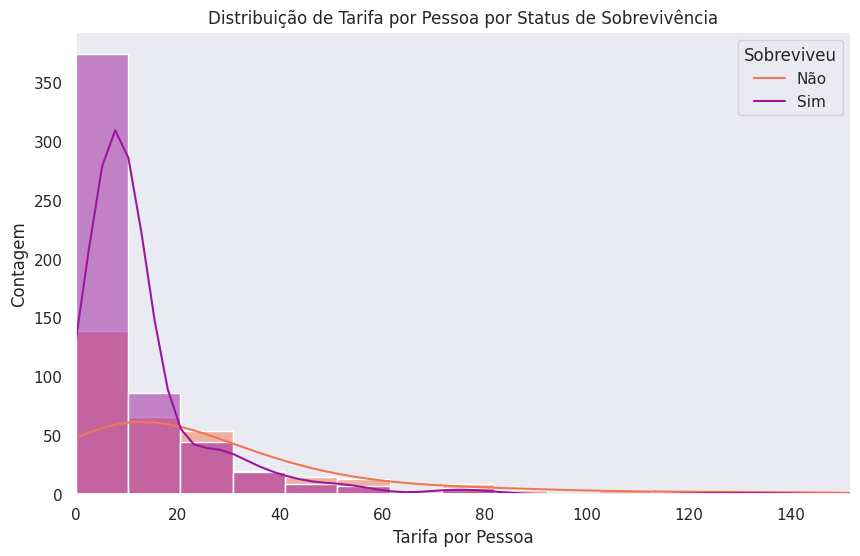

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='FarePerPerson', hue='Survived', kde=True, palette='plasma', bins=50)
plt.title('Distribuição de Tarifa por Pessoa por Status de Sobrevivência')
plt.xlabel('Tarifa por Pessoa')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.xlim(0, train['FarePerPerson'].quantile(0.99))
plt.show()

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      891 non-null    int64   
 1   Survived         891 non-null    int64   
 2   Pclass           891 non-null    int64   
 3   Name             891 non-null    object  
 4   Sex              891 non-null    object  
 5   Age              891 non-null    float64 
 6   SibSp            891 non-null    int64   
 7   Parch            891 non-null    int64   
 8   Ticket           891 non-null    object  
 9   Fare             891 non-null    float64 
 10  Embarked         891 non-null    object  
 11  Title            891 non-null    object  
 12  AgeGroup         891 non-null    category
 13  FamilySize       891 non-null    int64   
 14  IsAlone          891 non-null    int64   
 15  HasChildren      891 non-null    int64   
 16  ImmediateFamily  891 non-null    int64   
 1

In [48]:
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

In [49]:
categorical_cols_ohe = ['Embarked', 'Title', 'AgeGroup']

all_data = pd.concat([train.drop('Survived', axis=1), test], ignore_index=True)

all_data_encoded = pd.get_dummies(all_data, columns=categorical_cols_ohe, drop_first=True)

train_processed = all_data_encoded.iloc[:len(train)].copy()
test_processed = all_data_encoded.iloc[len(train):].copy()

train_processed.loc[:, 'Survived'] = train['Survived'].values

In [50]:
train_processed.shape

(891, 38)

In [51]:
test_processed.shape

(418, 37)

In [52]:
train_processed.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,FamilySize,...,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,AgeGroup_Teenager (13-17),AgeGroup_Adult (18-59),AgeGroup_Senior (60+),Survived
0,1,3,"Braund, Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2,...,False,True,False,False,False,False,False,True,False,0
1,2,1,"Cumings, John Bradley (Florence Briggs Thayer)",1,38.0,1,0,PC 17599,71.2833,2,...,False,False,True,False,False,False,False,True,False,1
2,3,3,"Heikkinen, Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,1,...,False,False,False,False,False,False,False,True,False,1
3,4,1,"Futrelle, Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2,...,False,False,True,False,False,False,False,True,False,1
4,5,3,"Allen, William Henry",0,35.0,0,0,373450,8.0500,1,...,False,True,False,False,False,False,False,True,False,0
